# Descriptive statistics notebook

**Ameena**: s153791
**Monika**: s182194
**Rasmus**: s154375


## Introduction
The goal of this notebook is to gain further understanding of the dataset by exploring each column and finding patterns and relationships among them.   
Good knowledge of the data will be important in the feature selection for the classification part of the challenge for choosing a relevant questions for the exploratory part.

### List of Sections
**1) Data cleaning**  
**2) Feature statistics and exploration** = Basics statistics of each feature, finding correaltion and patterns in data  
**3) Splitting training and test set** 

# 1) Data cleaning

At first we will load the Household Data and exclude columns that were engineered by the creators of the dataset from other features.

### 1.1 Load data

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
from folium import plugins
from pyproj import Proj
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px

%matplotlib inline
plt.style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_context("talk")

In [240]:
#load data information of households
data = pd.read_csv("HouseholdsData.csv")
excluded_colums = ['CLUSTER7','CLUSTER2', 'paraValidacion', 'EXCLUIR']
data = data.drop(excluded_colums, axis=1)
data.head()

Hogar  Sector    DirCoordX    DirCoordY  MontoArr  IngresoHogar  \
0  100010       7  335180.8019  6266420.975    100000        450845   
1  100020       7  338410.2114  6265607.141    120000       1019369   
2  100030       7  327863.8248  6257800.086     70000         80000   
3  100041       7  327864.0000  6257800.000     80000        559259   
4  100052       7  338480.8152  6267296.941    117771        710309   

       Factor  AnosEstudio  CLASE  Sup_Prom_Constr_Hab_EOD  ...  \
0  136.393738           11      1                     53.8  ...   
1   73.843597           11      1                     59.6  ...   
2  180.722809           10      1                     59.5  ...   
3  150.379059           14      2                     59.5  ...   
4  122.001518           12      2                     43.6  ...   

   Acc_Comercio_tpte_pub  Acc_Educacion_tpte_pub  Acc_Habitacion_tpte_pub  \
0              704.97642                406.0983               6110.62492   
1              704.97642                406.0983               6110.62492   
2              704.97642                406.0983               6110.62492   
3              704.97642                406.0983               6110.62492   
4              704.97642                406.0983               6110.62492   

   Acc_Industria_tpte_pub  Acc_Servicios_tpte_pub  Acc_Comercio_auto  \
0               671.08681               719.84272            3036.41   
1               671.08681               719.84272            3036.41   
2               671.08681               719.84272            3036.41   
3               671.08681               719.84272            3036.41   
4               671.08681               719.84272            3036.41   

   Acc_Educacion_auto  Acc_Habitacion_auto  Acc_Industria_auto  \
0             1781.81             30505.65             2853.19   
1             1781.81             30505.65             2853.19   
2             1781.81             30505.65             2853.19   
3             1781.81             30505.65             2853.19   
4             1781.81             30505.65             2853.19   

   Acc_Servicios_auto  
0             3058.03  
1             3058.03  
2             3058.03  
3             3058.03  
4             3058.03  

[5 rows x 26 columns]

In [241]:
housing_size = len(data)
print("Number of rows in the Household dataset: %d"%housing_size)

Number of rows in the Household dataset: 18264


In [242]:
#load data information of areas of Santiago 
data_geo = gpd.read_file('ZonasEOD2012.shp')
data_geo.tail()

ID    Com     Comuna  AREA-Ha  Excluir  \
861  116.0  13105  El Bosque    71.84        0   
862  115.0  13105  El Bosque    75.34        0   
863  106.0  13105  El Bosque   269.57        0   
864  104.0  13105  El Bosque    77.25        0   
865  103.0  13105  El Bosque    45.76        0   

                                              geometry  
861  POLYGON ((345133.4208225487 6286261.982521651,...  
862  POLYGON ((344415.4339754293 6285878.048256716,...  
863  POLYGON ((344415.4339754293 6285878.048256716,...  
864  POLYGON ((344151.2352592435 6285465.039511388,...  
865  POLYGON ((346376.6925730131 6286027.028697187,...

In [288]:
print("Number of communas in Santiago: %d"%len(data_geo['Comuna'].unique()))

Number of communas in Santiago: 45


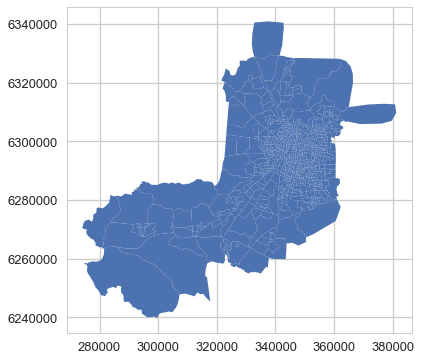

In [243]:
fig, ax = plt.subplots(figsize=(10,6))
data_geo.plot(ax=ax)

#### Merging the data sets

In [244]:
#Converting the household data set to af geodataset to assign communes etc for the households
geometry = [Point(xy) for xy in zip(data.DirCoordX, data.DirCoordY)]
gdata = gpd.GeoDataFrame(data, geometry=geometry)
gdata.tail()

Hogar  Sector    DirCoordX    DirCoordY  MontoArr  IngresoHogar  \
18259  700990       7  339104.1011  6263063.925    100000        300000   
18260  706781       2  338539.1741  6299539.203    140000        695186   
18261  706791       2  338563.2201  6299580.118    200000        396715   
18262  743813       5  349410.2812  6289668.962     80000        318005   
18263  743823       5  349370.5635  6289594.916     80000        140007   

           Factor  AnosEstudio  CLASE  Sup_Prom_Constr_Hab_EOD  ...  \
18259   75.526031           10      1                     59.6  ...   
18260  174.348663           12      2                     48.3  ...   
18261   71.358963           11      1                     48.3  ...   
18262   68.410446           12      2                     40.6  ...   
18263  231.671707            9      1                     34.1  ...   

       Acc_Educacion_tpte_pub  Acc_Habitacion_tpte_pub  \
18259               406.09830               6110.62492   
18260              1587.25210              26638.37017   
18261              1587.25210              26638.37017   
18262              2462.78833              36601.48715   
18263              1530.16896              24049.00136   

       Acc_Industria_tpte_pub  Acc_Servicios_tpte_pub  Acc_Comercio_auto  \
18259               671.08681               719.84272            3036.41   
18260              2667.49616              2815.13223            5968.57   
18261              2667.49616              2815.13223            5968.57   
18262              3033.01343              4514.08964            6042.83   
18263              2103.14796              2275.72271            6600.36   

       Acc_Educacion_auto  Acc_Habitacion_auto  Acc_Industria_auto  \
18259             1781.81             30505.65             2853.19   
18260             3338.36             57762.43             5435.38   
18261             3338.36             57762.43             5435.38   
18262             3649.00             62063.18             5250.73   
18263             3958.51             66407.19             5801.05   

       Acc_Servicios_auto                         geometry  
18259             3058.03  POINT (339104.1011 6263063.925)  
18260             6613.75  POINT (338539.1741 6299539.203)  
18261             6613.75  POINT (338563.2201 6299580.118)  
18262             5949.97  POINT (349410.2812 6289668.962)  
18263             6574.54  POINT (349370.5635 6289594.916)  

[5 rows x 27 columns]

In [245]:
#merging the geodata with the household data 
data = gpd.sjoin(gdata, data_geo, how="inner", op='intersects')
data = pd.DataFrame(data)
data.drop(['index_right', 'geometry'], axis=1)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning:

CRS of frames being joined does not match!



Hogar  Sector    DirCoordX    DirCoordY  MontoArr  IngresoHogar  \
0      100010       7  335180.8019  6266420.975    100000        450845   
7      100082       7  338923.4993  6266488.784    140000         79133   
9      100102       7  334850.7817  6266124.316    138696       1543874   
10     100112       7  335866.8423  6266308.101    150000        278046   
12     100161       7  338124.9988  6266113.566    112553         92754   
...       ...     ...          ...          ...       ...           ...   
17937  279941       3  357253.7033  6305137.968    515260        611136   
17831  278890       3  354480.6027  6305164.123   1500000        426979   
17832  278900       3  354360.8082  6305154.780    800000       6153343   
17861  279161       3  352456.5463  6304452.065    900000        601418   
18023  324491       1  348624.5667  6305654.859    194722        498111   

           Factor  AnosEstudio  CLASE  Sup_Prom_Constr_Hab_EOD  ...  \
0      136.393738           11      1                     53.8  ...   
7      114.663483           11      1                     53.8  ...   
9      108.940498           14      2                     53.8  ...   
10     139.501297           10      1                     53.8  ...   
12     114.663483           12      2                     53.8  ...   
...           ...          ...    ...                      ...  ...   
17937   18.684103          -99    -99                      0.0  ...   
17831   38.018532           17      3                    129.0  ...   
17832  279.129150           18      3                    129.0  ...   
17861  107.691895          -99    -99                     75.0  ...   
18023   86.730072           12      2                     40.1  ...   

       Acc_Comercio_auto  Acc_Educacion_auto  Acc_Habitacion_auto  \
0                3036.41             1781.81             30505.65   
7                3036.41             1781.81             30505.65   
9                3036.41             1781.81             30505.65   
10               3036.41             1781.81             30505.65   
12               3036.41             1781.81             30505.65   
...                  ...                 ...                  ...   
17937            6128.51             3320.63             58112.22   
17831            6533.31             3510.08             61611.27   
17832            6533.31             3510.08             61611.27   
17861            7021.85             3785.81             65973.12   
18023            6864.56             3733.04             66051.70   

       Acc_Industria_auto  Acc_Servicios_auto     ID    Com      Comuna  \
0                 2853.19             3058.03  786.0  13402        Buin   
7                 2853.19             3058.03  786.0  13402        Buin   
9                 2853.19             3058.03  786.0  13402        Buin   
10                2853.19             3058.03  786.0  13402        Buin   
12                2853.19             3058.03  786.0  13402        Buin   
...                   ...                 ...    ...    ...         ...   
17937             4301.75             7157.39  673.0  13132    Vitacura   
17831             4646.47             7692.46  676.0  13132    Vitacura   
17832             4646.47             7692.46  676.0  13132    Vitacura   
17861             5148.24             8414.47  678.0  13132    Vitacura   
18023             5543.50             8285.88  153.0  13107  Huechuraba   

       AREA-Ha  Excluir  
0       965.98        0  
7       965.98        0  
9       965.98        0  
10      965.98        0  
12      965.98        0  
...        ...      ...  
17937    48.64        1  
17831    81.18        0  
17832    81.18        0  
17861    63.50        0  
18023   202.15        1  

[18242 rows x 31 columns]

In [246]:
comuna_size = len(data['Comuna'])

print("Checking that every household has assigned a Comuna %a, which we can se it has" %comuna_size)

Checking that every household has assigned a Comuna 18242, which we can se it has


### 1.2 Missing values
When a feature has value **-99** this means that there was no response in survey.   
2.3% of the rows in dataset contains missing values. This is very high percentage, therefore we will exclude these rows from or model.

In [247]:
#count missing values
a = data.replace(-99, np.NaN)
a_missing = len(a[a.isnull().any(axis=1)])
a_percent = a_missing/housing_size*100
print("There are %d rows with missing values, which is %f%% of dataset"%(a_missing,a_percent))
a[a.isnull().any(axis=1)].head()

There are 424 rows with missing values, which is 2.321507% of dataset


Hogar  Sector    DirCoordX    DirCoordY  MontoArr  IngresoHogar  \
20    100252       7  341877.0000  6270590.000    193981        600000   
473   104870       2  340618.1836  6292159.436    160000             0   
571   105861       2  339850.7695  6301456.322    150000        111590   
1351  113811       1  345723.6978  6304693.506    130000        903627   
1780  118111       5  343490.3392  6286980.431    112329        295741   

          Factor  AnosEstudio  CLASE  Sup_Prom_Constr_Hab_EOD  ...  \
20     15.152181          NaN    NaN                     75.8  ...   
473    58.908264          NaN    NaN                     58.0  ...   
571    76.265007          NaN    NaN                     41.6  ...   
1351  105.309120          NaN    NaN                     38.6  ...   
1780   70.119965          NaN    NaN                     39.5  ...   

      Acc_Habitacion_auto  Acc_Industria_auto  Acc_Servicios_auto  \
20               30505.65             2853.19             3058.03   
473              62639.45             6083.56             6461.99   
571              65484.20             6142.82             7967.46   
1351             62135.37             5610.12             7735.47   
1780             68584.75             6280.98             7144.38   

                                   geometry  index_right     ID    Com  \
20                   POINT (341877 6270590)          747  792.0  13402   
473   POINT (340618.1836 6292159.436000001)          529   66.0  13102   
571   POINT (339850.7695 6301456.322000001)          334   80.0  13103   
1351        POINT (345723.6978 6304693.506)          287   89.0  13104   
1780        POINT (343490.3392 6286980.431)          428  107.0  13105   

           Comuna  AREA-Ha  Excluir  
20           Buin  6963.27        0  
473     Cerrillos   143.56        0  
571   Cerro Navia    59.28        0  
1351  ConchalÃÂ­    67.49        0  
1780    El Bosque    54.18        0  

[5 rows x 33 columns]

In [248]:
#drop missing values
data = a.dropna()
housing_size = len(data)
print("Size the Household dataset without NaN rows: %d"%housing_size)

Size the Household dataset without NaN rows: 17818


# 2) Feature statistics and exploration

### 2.1 Coordinates 
At first we need to convert coordinates ftom UTM format to Latitude and Longitude

In [282]:
myProj = Proj("+proj=utm +zone=19 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")
data2 = data.copy(deep=True)
lon, lat = myProj(data2['DirCoordX'].values, data2['DirCoordY'].values, inverse=True)

data['Lat'] = lat
data['Lon'] = lon

In [250]:
data.tail()

Hogar  Sector    DirCoordX    DirCoordY  MontoArr  IngresoHogar  \
17798  278541       3  357752.0314  6305962.128    932906       2271533   
17828  278860       3  357251.9640  6305114.029    350000       1547008   
17831  278890       3  354480.6027  6305164.123   1500000        426979   
17832  278900       3  354360.8082  6305154.780    800000       6153343   
18023  324491       1  348624.5667  6305654.859    194722        498111   

           Factor  AnosEstudio  CLASE  Sup_Prom_Constr_Hab_EOD  ...  \
17798   69.965424         17.0    3.0                      0.0  ...   
17828   19.587996         18.0    3.0                      0.0  ...   
17831   38.018532         17.0    3.0                    129.0  ...   
17832  279.129150         18.0    3.0                    129.0  ...   
18023   86.730072         12.0    2.0                     40.1  ...   

       Acc_Servicios_auto                         geometry  index_right  \
17798             7157.39  POINT (357752.0314 6305962.128)           22   
17828             7617.50   POINT (357251.964 6305114.029)           22   
17831             7692.46  POINT (354480.6027 6305164.123)           24   
17832             7692.46   POINT (354360.8082 6305154.78)           24   
18023             8285.88  POINT (348624.5667 6305654.859)           65   

          ID    Com      Comuna  AREA-Ha  Excluir        Lat        Lon  
17798  673.0  13132    Vitacura    48.64        1 -33.376197 -70.529190  
17828  673.0  13132    Vitacura    48.64        1 -33.383777 -70.534698  
17831  676.0  13132    Vitacura    81.18        0 -33.382954 -70.564476  
17832  676.0  13132    Vitacura    81.18        0 -33.383022 -70.565765  
18023  153.0  13107  Huechuraba   202.15        1 -33.377720 -70.627330  

[5 rows x 35 columns]

In [251]:
#USE FOLIUM TO PLOT HEATMAP OF THE HOUSES
sample = data
m = folium.Map([-33.4727092, -70.7699142], zoom_start=10)
m.add_child(plugins.HeatMap(sample[['Lat','Lon']].values, radius=15))
m

![alt text](heatmap.JPG)

### 2.2 CLASE = the target variable
There are 3 classes that we will predict in the Prediction Challenge. They are not equaly represented in the dataset with **class 2** having twice as much observations compared to **class 3**

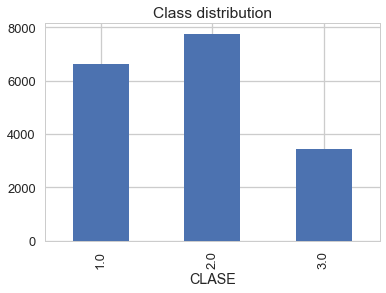

In [252]:
fig, ax = plt.subplots(figsize=(6,4))
clase_cnt = data.groupby('CLASE').count()['Hogar']
clase_cnt.plot.bar(x=clase_cnt.index, y='Hogar', ax=ax)
ax.set_title("Class distribution")
plt.show()

### 2.3 Sector
= Exogenous sector. There are 7 different sectors in the dataset.  
In the plots below you can see how many houses does each target class buy in each sector.  
There are only few houses that are bought by class 1 in sector 3, however majority houses bought by class 3 are in sector 3.

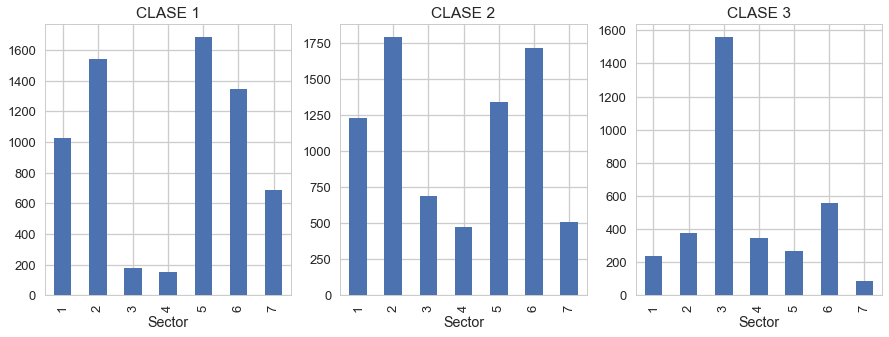

In [253]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
for i in range(1,4):
    tmp = data.loc[data['CLASE']==i].groupby('Sector').count()['Hogar']
    tmp.plot.bar(x=tmp.index, y='Hogar', ax=ax[i-1])
    ax[i-1].set_title("CLASE %d"%i)
    

###  2.4 Accessibility information

There are 10 features that give us information about accessibility of the house.
The missing records are denoted by value **-99**

*Accessibility by public transport to:*  
Commerce: **Acc_Comercio_tpte_pub**  
Education: **Acc_Educacion_tpte_pub**   
Residence: **Acc_Habitacion_tpte_pub**    
Industry: **Acc_Industria_tpte_pub**   
Services: **Acc_Servicios_tpte_pub**   

*Accessibility  by car to:*  
Commerce: **Acc_Comercio_auto**   
Education: **Acc_Educacion_auto**   
Residence: **Acc_Habitacion_auto**    
Industry: **Acc_Industria_auto**  
Services: **Acc_Servicios_auto**   

In [254]:
accessibility = ["Acc_Comercio_tpte_pub", "Acc_Educacion_tpte_pub", "Acc_Habitacion_tpte_pub", "Acc_Industria_tpte_pub", "Acc_Servicios_tpte_pub", 
                 "Acc_Comercio_auto", "Acc_Educacion_auto", "Acc_Habitacion_auto", "Acc_Industria_auto", "Acc_Servicios_auto"]

data[accessibility].describe()

Acc_Comercio_tpte_pub  Acc_Educacion_tpte_pub  Acc_Habitacion_tpte_pub  \
count           17818.000000            17818.000000             17818.000000   
mean             2326.807176             1331.428213             21438.282036   
std              1411.835331              729.555773             10473.369728   
min                46.226760               23.403120               374.878560   
25%              1257.907110              811.921770             14151.468420   
50%              2078.874310             1246.854420             21148.757080   
75%              3268.364730             1832.195310             29553.563730   
max              6096.118100             3151.932340             44854.376160   

       Acc_Industria_tpte_pub  Acc_Servicios_tpte_pub  Acc_Comercio_auto  \
count            17818.000000            17818.000000       17818.000000   
mean              1809.379052             2542.804306        5878.897899   
std               1029.939173             1771.321930        1575.927724   
min                 33.553590               56.474950        1048.440000   
25%               1038.710230             1105.525140        5081.660000   
50%               1656.292430             2048.700030        6085.000000   
75%               2553.385640             3561.078140        6961.840000   
max               4536.557030             7713.396150        8583.060000   

       Acc_Educacion_auto  Acc_Habitacion_auto  Acc_Industria_auto  \
count        17818.000000         17818.000000        17818.000000   
mean          3389.701249         58137.043591         5084.962609   
std            849.297468         13915.371521         1287.991252   
min            613.410000         10856.450000         1030.760000   
25%           3058.770000         53012.510000         4512.550000   
50%           3529.230000         61213.100000         5302.700000   
75%           3991.320000         68367.940000         6006.600000   
max           4681.260000         75774.780000         7260.030000   

       Acc_Servicios_auto  
count        17818.000000  
mean          6291.490122  
std           1910.481495  
min           1061.180000  
25%           5091.160000  
50%           6432.510000  
75%           7683.200000  
max          10000.680000

#### Normalize accessibility data
From the descriptive statistics, we can see that the accessibility data have different scales. Therfore we will normalize them first and compare distributions.


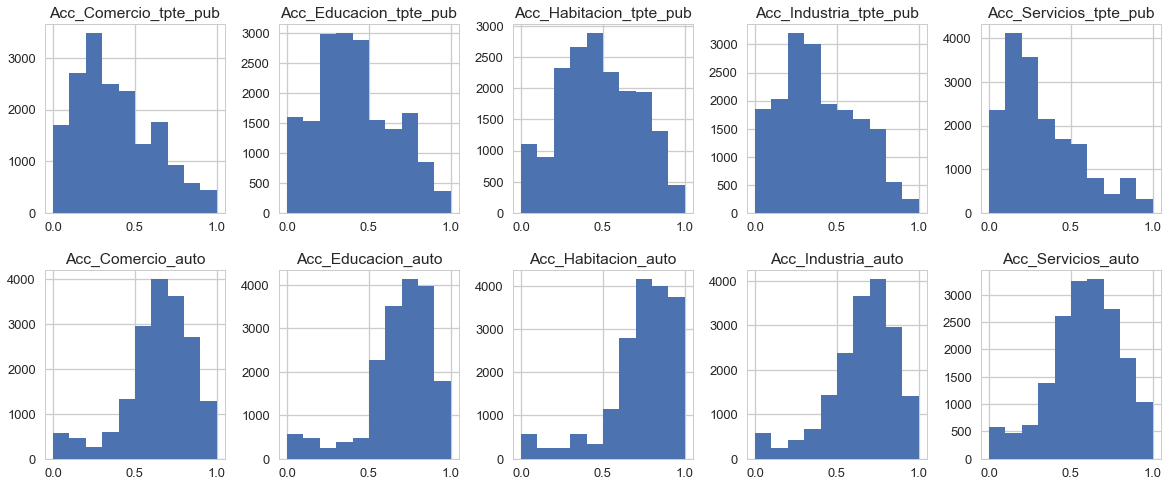

In [255]:
#normalizing data to [0,1] scale
a =(data[accessibility]-data[accessibility].min())/(data[accessibility].max()-data[accessibility].min())
data[accessibility] = a

fig, ax = plt.subplots(2,5,figsize=(20,8))
k = 0
for i in range(2):
    for j in range(5):
        data[accessibility].hist(column=accessibility[k], ax=ax[i,j])
        k +=1
plt.show()

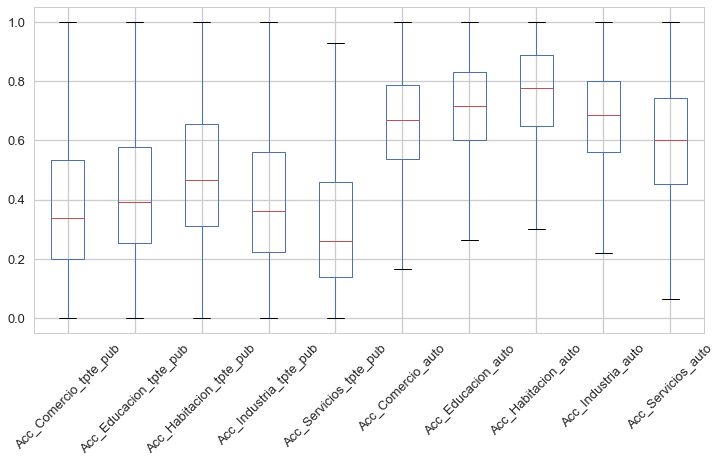

In [256]:
fig, ax = plt.subplots(figsize=(12,6))
data.boxplot(column=accessibility, ax=ax)
ax.tick_params(axis='x', rotation=45)

The median accessibility by public transport is considerably lower then median car accessibility. This could mean that the public transport network is not very sufficient comared to travelling by car.

While the distriution of car accessibility variables is skewed to right, there is a number of observations close to the minimum values. This seem like there are some areas with very low car accesibility areas in the city. 

In the map below for *Acc_Industria_auto* we can see that there are several other towns and outskirts of Santiago far away from the city centre where the industry is mainly located. This explains the low accessibility by car.

It could be interesting to further explore these remote loacations.

In [257]:
fig = px.scatter_mapbox(data, lat="Lat", lon="Lon", zoom=9, height=400, color="Acc_Industria_auto",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=7)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

![alt text](industry.JPG)

#### Correlation of Accessibility Variables
The distributions of the variables look similar for car variables and public transport variables. 
Therefore we will have a closer look at correlation between the variables in the heatmap below.

There is strong positive correlation for all of them therefore it may be a good choice to select just one accessibility feature to incude in model.

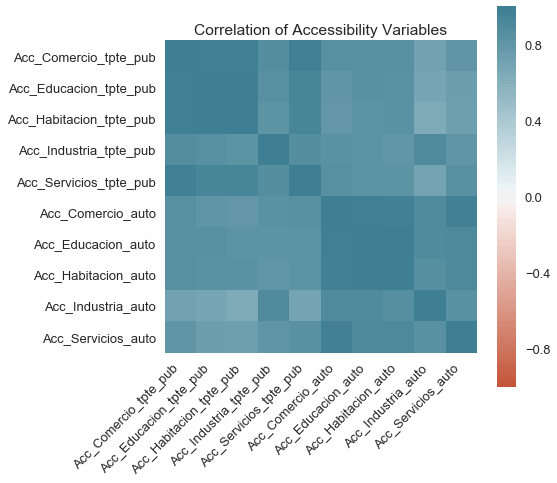

In [258]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title("Correlation of Accessibility Variables")

corr = data[accessibility].corr(method ='spearman')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### 2.5 House income and Monthly dwelling rent 

There are 4 features that give us information about type of household and their monthly dwelling rent.

*Household information:*  
Household income (Chilean Peso): **IngresoHogar**  
Expansion factor of household in survey: **Factor**   
Years of formal Education of head of household: **AnosEstudio**  

*Household monthly rent:*  
Monthly dwelling rent (Chilean Peso): **MontoArr**   

In [259]:
type_house = ["IngresoHogar","AnosEstudio","MontoArr", "Factor"]

data[type_house].describe()

IngresoHogar   AnosEstudio      MontoArr        Factor
count  1.781800e+04  17818.000000  1.781800e+04  17818.000000
mean   6.821060e+05     12.141037  1.861724e+05    112.605874
std    7.082763e+05      3.526745  1.580758e+05     74.223063
min    0.000000e+00      0.000000  1.000000e+04      5.151379
25%    2.991212e+05     10.000000  1.103375e+05     68.394522
50%    5.040135e+05     12.000000  1.500000e+05     94.607391
75%    8.375370e+05     14.000000  2.000000e+05    133.587433
max    1.480000e+07     24.000000  5.000000e+06    927.142761

There are 21 different years of "classes" of formal education of head of household that are presented in the data.
They are not equaly represented in the dataset, but with 12 years of formal Education over representated. And can see that there is either 0 years of education or four years of education and nothing in between. 


We are plotting the years of formal Education of head of household. And can see that there is either 0 years of education or four years of education and nothing in between. 

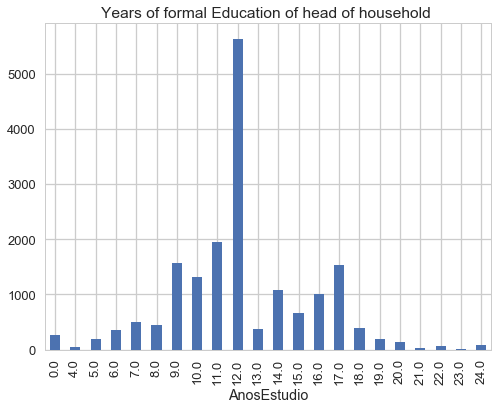

In [260]:
fig, ax = plt.subplots(figsize=(8,6))
income = data.groupby('AnosEstudio').count()['IngresoHogar']
income.plot.bar(x=income.index, y='IngresoHogar', ax=ax)
ax.set_title("Years of formal Education of head of household ")
plt.show()

We are now box plotting the years of formal education to get a better visualisation of the date, and can see that there is a few outliers.

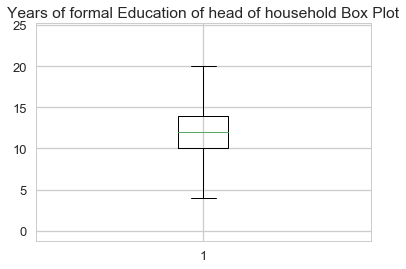

In [261]:
fig1, ax1 = plt.subplots()
ax1.set_title('Years of formal Education of head of household Box Plot')
ax1.boxplot(data['AnosEstudio'])
plt.show()

#### Normalize data
From the descriptive statistics, we can see that the household data have different scales. Therfore we will normalize them first and compare them.

In [262]:
#normalizing data to [0,1] scale
a =(data[type_house]-data[type_house].min())/(data[type_house].max()-data[type_house].min())
data[type_house] = a

a.describe()

IngresoHogar   AnosEstudio      MontoArr        Factor
count  17818.000000  17818.000000  17818.000000  17818.000000
mean       0.046088      0.505877      0.035305      0.116546
std        0.047857      0.146948      0.031679      0.080503
min        0.000000      0.000000      0.000000      0.000000
25%        0.020211      0.416667      0.020108      0.068594
50%        0.034055      0.500000      0.028056      0.097025
75%        0.056590      0.583333      0.038076      0.139303
max        1.000000      1.000000      1.000000      1.000000

We are now box plotting the data and can see that there is heavy outliers.

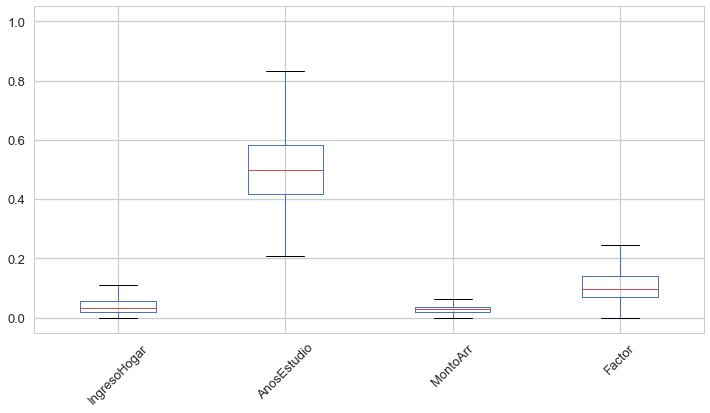

In [263]:
fig, ax = plt.subplots(figsize=(12,6))
data.boxplot(column=type_house, ax=ax)
ax.tick_params(axis='x', rotation=45)

We will now see if there is any relationship between the income and monthly rent. 

And it seems like most of the monthly rent are primary below 0.2 and the income is also primary below 0.4.


It would have been good to look into if the monthly rent have a relationship with the zones where they are located.
If there is any correlation between location and monthly rent?

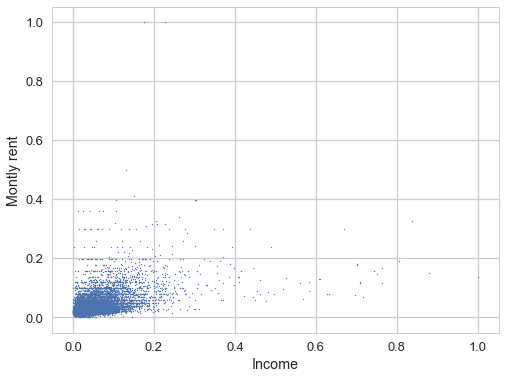

In [264]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['IngresoHogar'], data['MontoArr'], s=0.9)
ax.set_xlabel("Income")
ax.set_ylabel("Montly rent")
plt.show()

We will now see if there is any relationship between the income and years of formal education of the head of household. And can see that the higher the education the higher the income. 

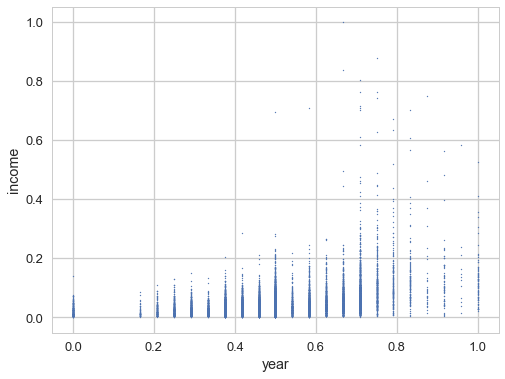

In [265]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['AnosEstudio'], data['IngresoHogar'], s=0.9)
ax.set_xlabel("year")
ax.set_ylabel("income")
plt.show()

#### Correlation of household variables
The distributions of the variables does not look similar in their distribution. 
Therefore we will have a closer look at correlation between the variables in the heatmap below.

There is no strong positive correlation for all of them, but there is zero or very very small correlation in the Factor with the other variables - it might be consider just to take out the feature. 

Furhtermore, there is positive correlation between the years of education and the rent, and the level of income and the rent. 

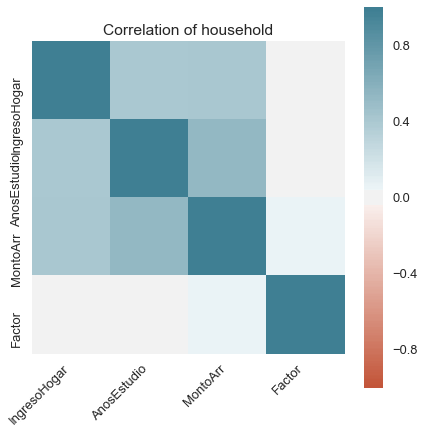

In [266]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title("Correlation of household")

corr = data[type_house].corr(method ='spearman')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## 2.6 Condition of the house
 
The condition of the house are given in 4 features: 

*House condition:*  
Average Built surface of residential units in Zone: **Sup_Prom_Constr_Hab_EOD**  
Average Construction Quality of residential units in zone: **Calid_EOD_norm_inv**   
Built density in zone (built surface divided by zone surface): **DensConstr_EOD**  

*Monthly rent of house:*  
Monthly dwelling rent (Chilean Peso): **MontoArr**

In [267]:
House_condition = ["Sup_Prom_Constr_Hab_EOD","Calid_EOD_norm_inv","DensConstr_EOD","MontoArr"]

data[House_condition].describe()

Sup_Prom_Constr_Hab_EOD  Calid_EOD_norm_inv  DensConstr_EOD  \
count              17818.00000        17818.000000    17818.000000   
mean                  49.55930            0.651950        0.375630   
std                   22.24734            0.346922        0.454916   
min                    0.00000            0.000000        0.000000   
25%                   39.00000            0.360000        0.177000   
50%                   45.40000            0.780000        0.253000   
75%                   56.30000            0.980000        0.353000   
max                  207.30000            1.000000        4.599000   

           MontoArr  
count  17818.000000  
mean       0.035305  
std        0.031679  
min        0.000000  
25%        0.020108  
50%        0.028056  
75%        0.038076  
max        1.000000

#### Normalize data
From the descriptive statistics, we can see that the household data have different scales. Therfore we will normalize them first and compare them through a box plot.

In [268]:
#normalizing data to [0,1] scale
a =(data[House_condition]-data[House_condition].min())/(data[House_condition].max()-data[House_condition].min())
data[House_condition] = a

a.describe()

Sup_Prom_Constr_Hab_EOD  Calid_EOD_norm_inv  DensConstr_EOD  \
count             17818.000000        17818.000000    17818.000000   
mean                  0.239070            0.651950        0.081676   
std                   0.107320            0.346922        0.098916   
min                   0.000000            0.000000        0.000000   
25%                   0.188133            0.360000        0.038487   
50%                   0.219006            0.780000        0.055012   
75%                   0.271587            0.980000        0.076756   
max                   1.000000            1.000000        1.000000   

           MontoArr  
count  17818.000000  
mean       0.035305  
std        0.031679  
min        0.000000  
25%        0.020108  
50%        0.028056  
75%        0.038076  
max        1.000000

We are now box plotting the data and can see that there is heavy outliers for the rent (as shown above) and for the Average Built surface of residential units in Zone, and for Built density in zone (built surface divided by zone surface). 

Average Construction Quality of residential units in zone have no outliers but are skewed to the right.

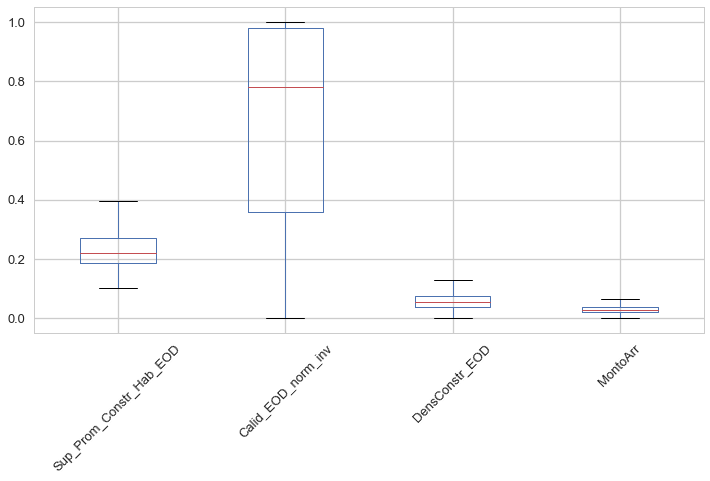

In [269]:
fig, ax = plt.subplots(figsize=(12,6))
data.boxplot(column=House_condition, ax=ax)
ax.tick_params(axis='x', rotation=45)

#### Correlation of household variables
The distributions of the variables does not look similar in their distribution. 
Therefore we will have a closer look at correlation between the variables in the heatmap below.

There is no strong positive correlation for all of them, but there is definitely a negative correlation in the Average Built surface of residential units in Zone and the Average Construction Quality of residential units in zone. There is a small positive correlation between Average Built surface of residential units in Zone and the Built density in zone which make sense. 

It could have need good to look have divided the rent based on the zone to see the correlation of the condition of the houses.

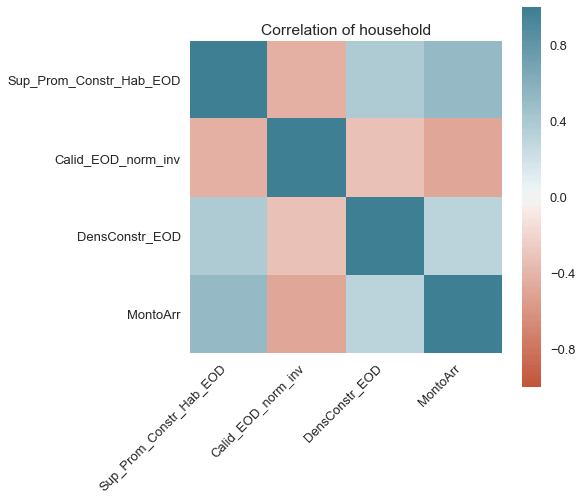

In [270]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title("Correlation of household")

corr = data[House_condition].corr(method ='spearman')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## 2.7 Distance 

*Travel:*  
Distance to nearest subwat station (km): **Dist_est_Metro_MC_KM** 

Distance to nearest highway exit (km): **Dist_salida_Autop_MC_KM**

Travel time to Central Business District: **Tiempo_Com_Stgo**



In [271]:
travel = ['Dist_est_Metro_MC_KM','Dist_salida_Autop_MC_KM','Tiempo_Com_Stgo']

In [272]:
data[travel].describe()

Dist_est_Metro_MC_KM  Dist_salida_Autop_MC_KM  Tiempo_Com_Stgo
count          17818.000000             17818.000000     17818.000000
mean               4.592735                 1.991035        59.276855
std                7.585191                 1.666934        21.868110
min                0.014242                 0.012117         2.000000
25%                0.859434                 0.887417        45.000000
50%                1.957325                 1.541659        59.000000
75%                4.256828                 2.591902        71.000000
max               49.844325                13.618582       202.000000

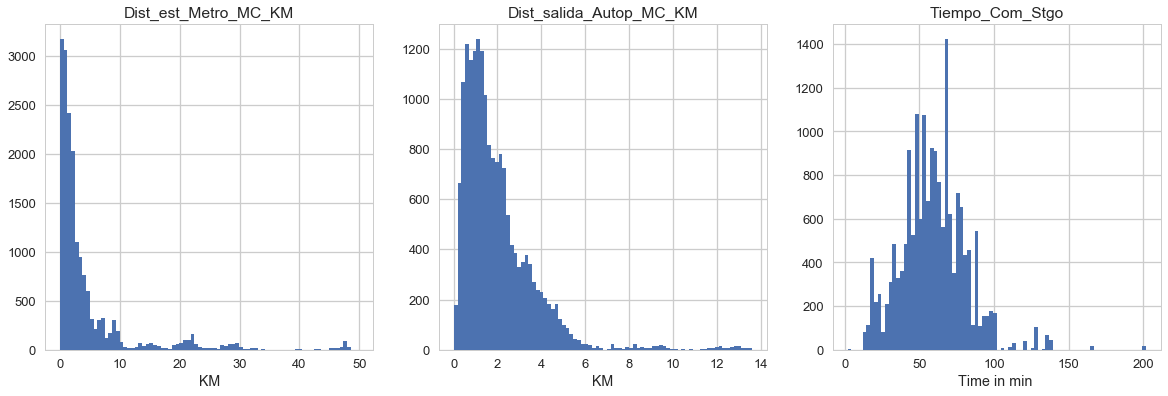

In [273]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))

ax1.hist(data[travel[0]], bins=80)
ax1.set_xlabel('KM')
ax1.set_title(travel[0])
ax2.hist(data[travel[1]],bins=80)
ax2.set_xlabel('KM')
ax2.set_title(travel[1])
ax3.hist(data[travel[2]],bins =80)
ax3.set_xlabel('Time in min ')
ax3.set_title(travel[2])
plt.show()


We can from the plots and the descriptive see that around 75% is within the mean regarding travel time and distance. 

#### Nomalizing the data to compare them 

In [274]:
a =(data[travel]-data[travel].min())/(data[travel].max()-data[travel].min())
a.describe()

Dist_est_Metro_MC_KM  Dist_salida_Autop_MC_KM  Tiempo_Com_Stgo
count          17818.000000             17818.000000     17818.000000
mean               0.091882                 0.145439         0.286384
std                0.152221                 0.122510         0.109341
min                0.000000                 0.000000         0.000000
25%                0.016961                 0.064330         0.215000
50%                0.038994                 0.112413         0.285000
75%                0.085141                 0.189600         0.345000
max                1.000000                 1.000000         1.000000

In the descriptive analysis above we can see the the average comute to the CBD is approx. 60 min, with some outliers, that have a max travel time of 200 min.

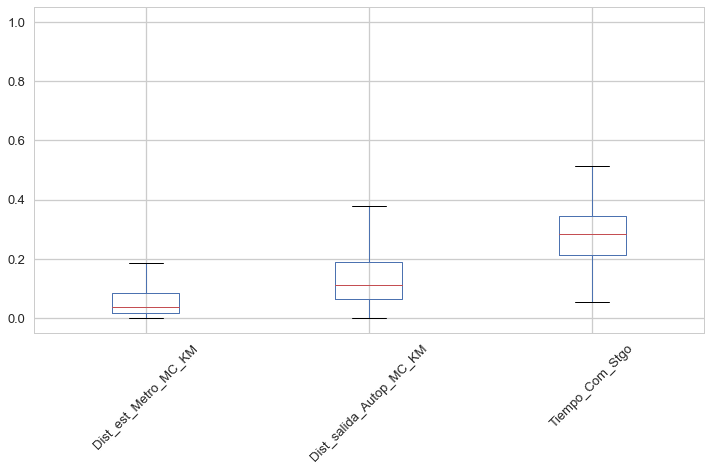

In [275]:
fig, ax = plt.subplots(figsize=(12,6))
a.boxplot(column=travel, ax=ax)
ax.tick_params(axis='x', rotation=45)

We can see that there are some heavy outliers in the distance to metro and nearest highway exit. This is also seen in the histograms, that most of thm og within the average, but some or out. The Time to Central Business District has some outliers, but is more normal distributed, were as the two others are exponential distributed. 


## 2.8 Income
Average Zonal income = **Ingreso_Promedio_Zona_MM**

In [276]:
income = ['Ingreso_Promedio_Zona_MM']
data[income].describe()

Ingreso_Promedio_Zona_MM
count              17818.000000
mean                   0.679355
std                    0.375871
min                    0.147514
25%                    0.475470
50%                    0.578636
75%                    0.725043
max                    4.957229

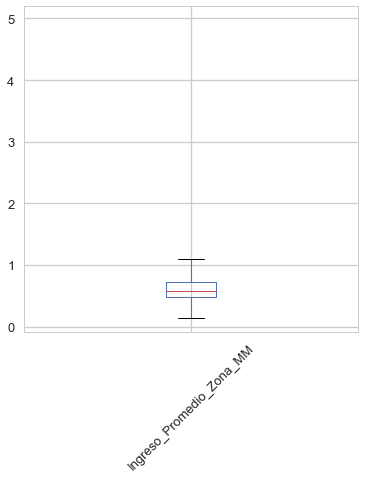

In [277]:
fig, ax = plt.subplots(figsize=(6,6))
data.boxplot(column=income, ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.show()

It is seen the the average income is around 0.67 million pesos. It is also seen from the boxplot that it has a tail towards the top, where quite some people has a income above 1 million pesos, and then it becomes lesser, and i single has an income of around 5 million pesos. As seen, there are outleirs. 

#### How is average income distrubuted across Santiago 

In [289]:
fig = px.scatter_mapbox(data, lat="Lat", lon="Lon", zoom=9, height=400, color="Ingreso_Promedio_Zona_MM",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=7,size="Ingreso_Promedio_Zona_MM")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

![ngresso](ingreso.JPG)

From the plot above, it i clearly visible that that richer people of Santiago tends to live in the north east corner of the city. I people with lower average income tends to live more to the west, south west, south og the city. 

# 3) Splitting training and test set

In [279]:
data_test = data.loc[((data['Lat'] <= -33.4) & (data['Lat'] >= -33.5) & (data['Lon'] <= -70.6) & (data['Lon'] >= -70.7))]
data_train = data.drop(data_test.index)
test_train = len(data_train)+len(data_test)
print("The total amount af train and test data: %a, and the full data: %f "%(test_train, housing_size))

The total amount af train and test data: 17818, and the full data: 17818.000000 


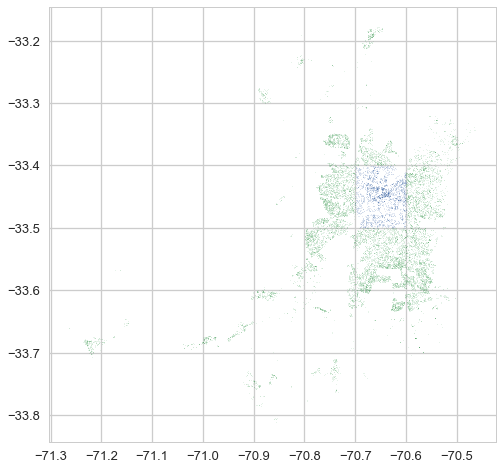

In [280]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(data_test['Lon'],data_test['Lat'], s=0.01)
ax.scatter(data_train['Lon'],data_train['Lat'],s=0.01)
plt.show()

## Conclusion

Our main takeaways from the analysis:

- The dataset contains houses in Santiago as well as outskirts and neighbouring towns. Some of these are very low income and accessibility areas.
- Target classes are not distributed evenly in the data so we will need to consider that in the classification challenge
- Accessibility features are highly correlated so we will pick just one or two out of 10 for the classification
- Household variables and rent are mildly positively correlated, however *Expansion factor of household* is against expectations not correlated to these at all, therefore we consider not including it in classification.
- From the distance variables we've also confirmed that there are some very secluded areas with big distance from public transport and highways
- There is a clear divide between high income and low income areas in Santiago


### Ideas for the future analysis
- Include points of interest from Open Street Map such as hospitals, schools, etc. in the exploratory component of the challenge.
- Further explore how is rent related to different zones and condition of the house
- Find the best neighborhood in Santiago to live in based on commute times, accessibility, rent etc.
- Further analyze the lowest acessibility neighborhoods.
- Compare the differences for Santiago neighborhoods with lowest and highest living standard.

# The individual contributions

In the following tabel the individual contribution are shown:


In [281]:
from pandas import DataFrame

contribution = {'Name:':  ['Ameena','Monika','Rasmus'],
                'Contribution (section):': ['2.5, 2.6','Intro.,1.2, 2.2, 2.3, 2.4, Concl.','1.1, 2.1, 2.7, 2.8, 3']
       }

frame = DataFrame(contribution, columns = ['Name:','Contribution (section):'])

frame

Name:            Contribution (section):
0  Ameena                           2.5, 2.6
1  Monika  Intro.,1.2, 2.2, 2.3, 2.4, Concl.
2  Rasmus              1.1, 2.1, 2.7, 2.8, 3